In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import haversine as hs
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#Created a user-defined function to change timestamp to Date-Time variable.
def time_date(df):
    td = df.timestamp.apply(lambda x: datetime.fromtimestamp(x))
    df['Date_Time'] = td
    df['date'] = pd.DatetimeIndex(df.Date_Time).date
    df['time'] = pd.DatetimeIndex(df.Date_Time).time
    df['day'] = pd.DatetimeIndex(df.Date_Time).day
    df['Weekday'] = df['Date_Time'].dt.day_name()
    return df

#Created a user-defined function to create distance from longitude and latitude.
def distance(data):
    data_dist = data.loc[:, 'longitude':'latitude']
    
    data_dist['longitude'] = data['longitude'].astype(object)
    data_dist['latitude'] = data['latitude'].astype(object)
    
    data_dist['p_latitude'] = data_dist['latitude'].shift(1)
    data_dist['p_longitude'] = data_dist['longitude'].shift(1)


    data['distance'] = data_dist[['p_latitude', 'p_longitude', 'latitude','longitude']].apply(lambda x: hs.haversine((x[1], x[0]), (x[3], x[2])), axis=1)
    return data

#Created a user-defined function to find trips by particular date. We assumed that when distance becomes zero, that constitutes
# a trip and we have done that for each date in the dataset.
def trips(data_frame, date):
    data_frame['date'] = data_frame['date'].astype(str)
    data = data_frame.loc[data_frame['date'] == date]
    #This is going to combine multiple consecutive rows with 0 value distance into one. Which is how we say it's one trip.
    date_processed = data.loc[data["distance"].shift() != data["distance"]]
    date2 = date_processed['distance'].value_counts()
    date3 = date2.loc[0]
    return date3

#This user-defined function gives us the no of trips per week bu using the trips() function.
def trip_per_week(weeks, data):
    trips_week_dict = {}
    for (i,w) in enumerate(weeks):
        trips_week = 0
        for date in w:
            trips_week+= trips(data, date)
        trips_week_dict.update({i:trips_week})
    return trips_week_dict

#This user-defined function gives us the number of trips per week for every vehicle.
def vehicle_trip(data, weeks):
    df = distance(data)
    return trip_per_week(weeks, df)

#This user-defined function will give us the graph of the 'fuelLevel' vs 'date' to tell us when was the refueling done.
def fueling_increment(data):
    #Grouping by date and getting the max value of fuel
    data_fuel = data.groupby('date')['fuelLevel'].max().reset_index()
    #Changing the date to index
    data_fuel['date'] = pd.to_datetime(data_fuel['date'])
    data_fuel.set_index('date', inplace = True)
    data_fuel.index
    #Plotting the graph now
    fig = plt.figure(figsize=(10,10))
    plt.plot(data_fuel)
    plt.xlabel('Date')
    return plt.show()

### 1) Checking for number of trips per week

In [2]:
# Week has been manually calculated using, `data2['date'].value_counts()` and by comparing those
# values with a calender. We could have automated this using 'isocalender()' from 'datetime.date'
# But for the sake of this assignment, I am skipping that part

# Vehicle 1
vehicle1_data = pd.read_csv("D:\\CO2OPT\\exploring-telematics-data-main-telematics_data\\telematics_data\\vehicle_1.csv")
time_date(vehicle1_data)
week = [['2021-11-18']]
vehicle1_trips = vehicle_trip(vehicle1_data, week)
print("Trips of Vehicle 1:", vehicle1_trips)

#----------------------------------------------- #

# Vehicle 2
vehicle2_data = pd.read_csv("D:\\CO2OPT\\exploring-telematics-data-main-telematics_data\\telematics_data\\vehicle_2.csv")
time_date(vehicle2_data)
week = [['2021-09-29','2021-09-30'],['2021-10-05','2021-10-06']]
vehicle2_trips = vehicle_trip(vehicle2_data, week)
print("Trips of Vehicle 2:", vehicle2_trips)

# ----------------------------------------------- #

#Vehicle 3 
vehicle3_data = pd.read_csv("D:\\CO2OPT\\exploring-telematics-data-main-telematics_data\\telematics_data\\vehicle_3.csv")
time_date(vehicle3_data)
week = [['2022-04-06','2022-04-06', '2022-04-06']]
vehicle3_trips = vehicle_trip(vehicle3_data, week)
print("Trips of Vehicle 3:", vehicle3_trips)

# ----------------------------------------------- #

#Vehicle 4
vehicle4_data = pd.read_csv("D:\\CO2OPT\\exploring-telematics-data-main-telematics_data\\telematics_data\\vehicle_4.csv")
time_date(vehicle4_data)
week = [['2022-03-07','2022-03-08','2022-03-09','2022-03-10']]
vehicle4_trips = vehicle_trip(vehicle4_data, week)
print("Trips of Vehicle 4:", vehicle4_trips)

# ----------------------------------------------- #

#Vehicle 5
vehicle5_data = pd.read_csv("D:\\CO2OPT\\exploring-telematics-data-main-telematics_data\\telematics_data\\vehicle_5.csv")
time_date(vehicle5_data)
week = [['2021-09-29', '2021-09-30', '2021-10-01']]
vehicle5_trips = vehicle_trip(vehicle5_data, week)
print("Trips of Vehicle 5:", vehicle5_trips)

# ----------------------------------------------- #

#Vehicle 6
vehicle6_data = pd.read_csv("D:\\CO2OPT\\exploring-telematics-data-main-telematics_data\\telematics_data\\vehicle_6.csv")
time_date(vehicle6_data)
week = [['2021-09-29','2021-09-30','2021-10-01'], ['2021-10-05','2021-10-06']]
vehicle6_trips = vehicle_trip(vehicle6_data, week)
print("Trips of Vehicle 6:", vehicle6_trips)

# ----------------------------------------------- #

#Vehicle 7 
vehicle7_data = pd.read_csv("D:\\CO2OPT\\exploring-telematics-data-main-telematics_data\\telematics_data\\vehicle_7.csv")
time_date(vehicle7_data)
week = [['2022-03-15','2022-03-16','2022-03-17']]
vehicle7_trips = vehicle_trip(vehicle7_data, week)
print("Trips of Vehicle 7:", vehicle7_trips)

# ----------------------------------------------- #

#Vehicle 8
vehicle8_data = pd.read_csv("D:\\CO2OPT\\exploring-telematics-data-main-telematics_data\\telematics_data\\vehicle_8.csv")
time_date(vehicle8_data)
week = [['2021-09-29','2021-09-30','2021-10-01'], ['2021-10-05','2021-10-06']]
vehicle8_trips = vehicle_trip(vehicle8_data, week)
print("Trips of Vehicle 8:", vehicle8_trips)

# ----------------------------------------------- #

#Vehicle 9
vehicle9_data = pd.read_csv("D:\\CO2OPT\\exploring-telematics-data-main-telematics_data\\telematics_data\\vehicle_9.csv")
time_date(vehicle9_data)
week = [['2021-09-29','2021-10-01'], ['2021-10-06','2021-10-07','2021-10-07'],['2021-10-11','2021-10-12']]
vehicle9_trips = vehicle_trip(vehicle9_data, week)
print("Trips of Vehicle 9:", vehicle9_trips)

# ----------------------------------------------- #

#Vehicle 10
vehicle10_data = pd.read_csv("D:\\CO2OPT\\exploring-telematics-data-main-telematics_data\\telematics_data\\vehicle_10.csv")
time_date(vehicle10_data)
week = [['2021-09-29','2021-09-30','2021-10-01']]
vehicle10_trips = vehicle_trip(vehicle10_data, week)
print("Trips of Vehicle 10:", vehicle10_trips)

# ----------------------------------------------- # 

Trips of Vehicle 1: {0: 1}
Trips of Vehicle 2: {0: 106, 1: 88}
Trips of Vehicle 3: {0: 363}
Trips of Vehicle 4: {0: 286}
Trips of Vehicle 5: {0: 196}
Trips of Vehicle 6: {0: 155, 1: 44}
Trips of Vehicle 7: {0: 17}
Trips of Vehicle 8: {0: 141, 1: 60}
Trips of Vehicle 9: {0: 8, 1: 104, 2: 110}
Trips of Vehicle 10: {0: 200}


### 2) Checking for re-fueling date per vehicle

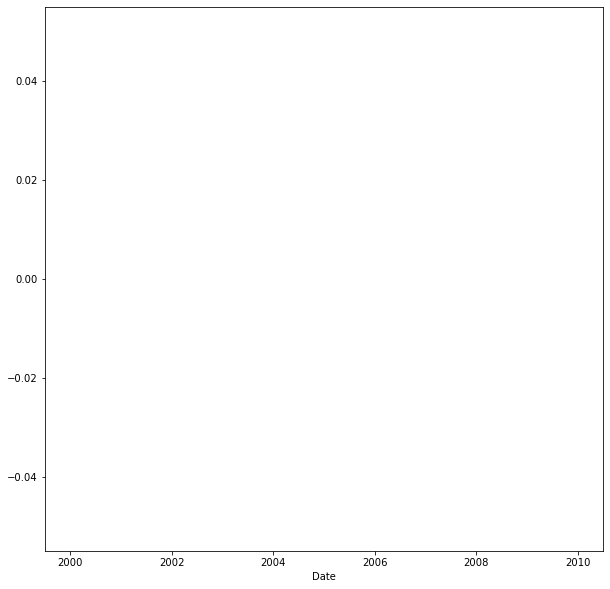

In [3]:
fueling_increment(vehicle1_data)

*The plot for Vehicle 1 is empty because 'fuelLevel' has null values.*

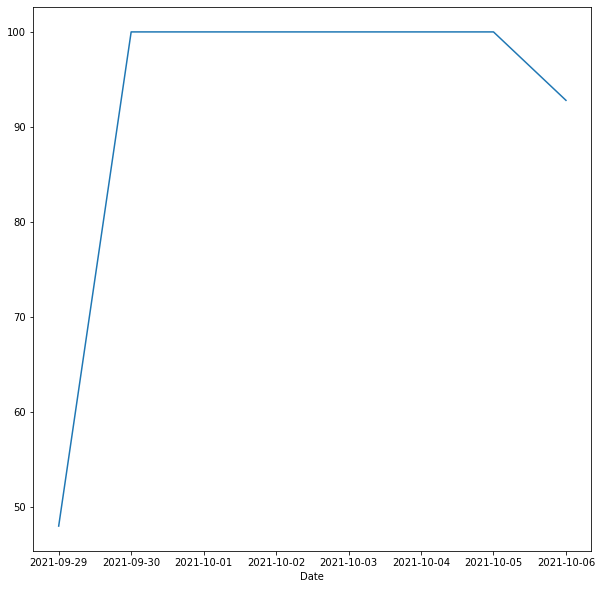

In [4]:
fueling_increment(vehicle2_data)

*It is clear from the graph that Vehicle 2 refueled on 09/30/2021*

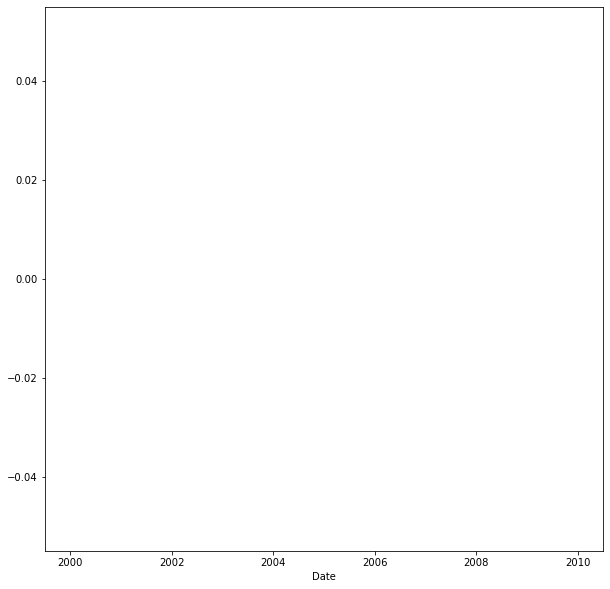

In [5]:
fueling_increment(vehicle3_data)

*The plot for Vehicle 3 is empty because 'fuelLevel' has null values.*

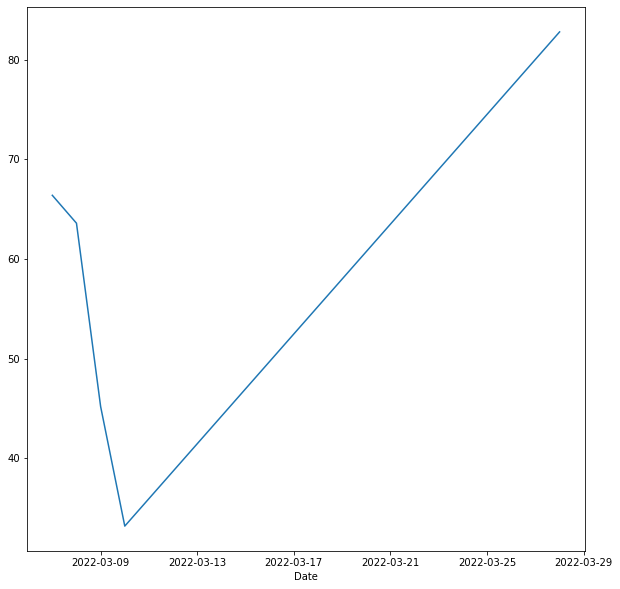

In [6]:
fueling_increment(vehicle4_data)

*It is clear from the graph that Vehicle 4 refueled on 03/28/2022. Graph can be better represented if we use a proper figsize().*

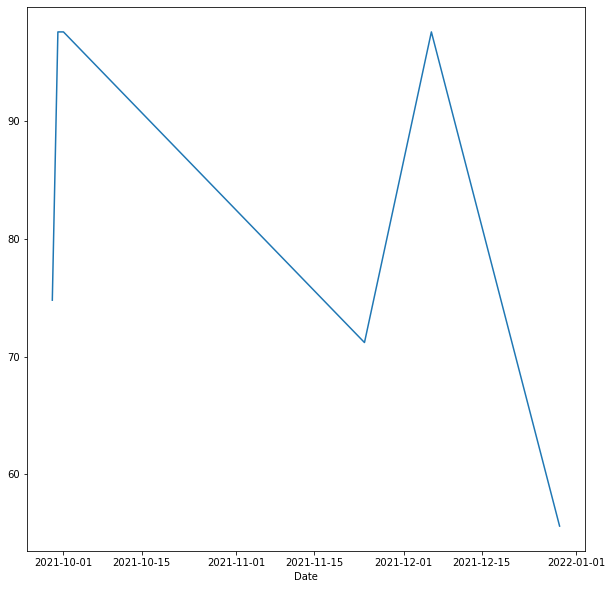

In [7]:
fueling_increment(vehicle5_data)

*It is clear from the graph that Vehicle 5 refueled on 09/30/2021 and 06/12/2021. Graph can be better represented if we use a proper figsize().*

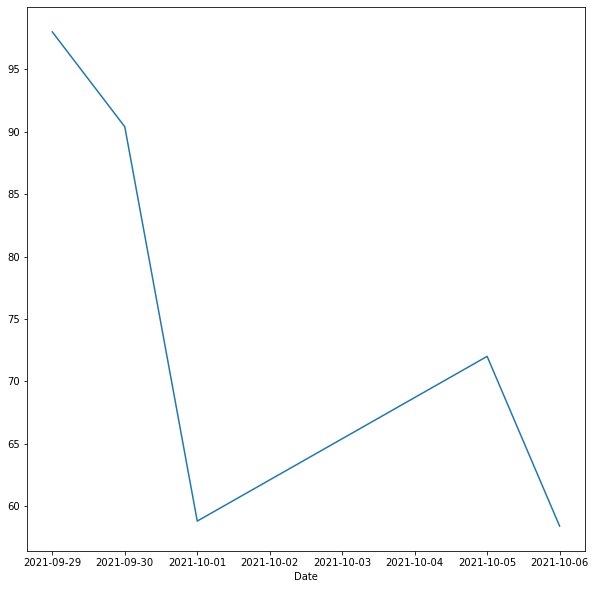

In [8]:
fueling_increment(vehicle6_data)

*It is clear from the graph that Vehicle 6 refueled on 09/29/2021(start of the trip) and 05/10/2021.*

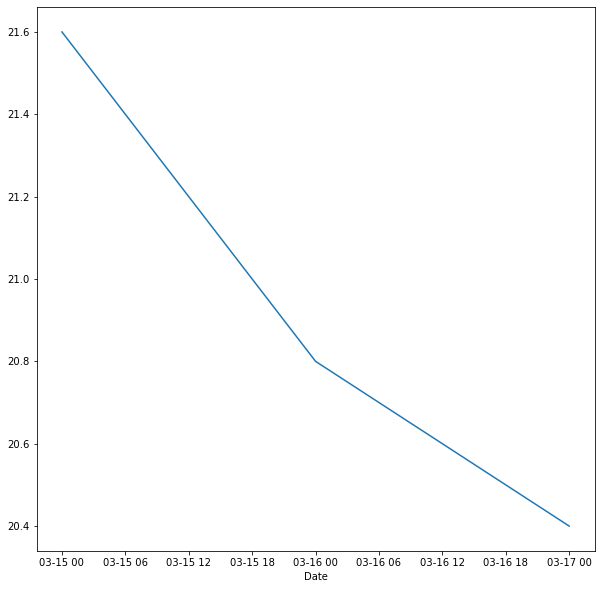

In [9]:
fueling_increment(vehicle7_data)

*It is clear from the graph that Vehicle 7 was never refueled.*

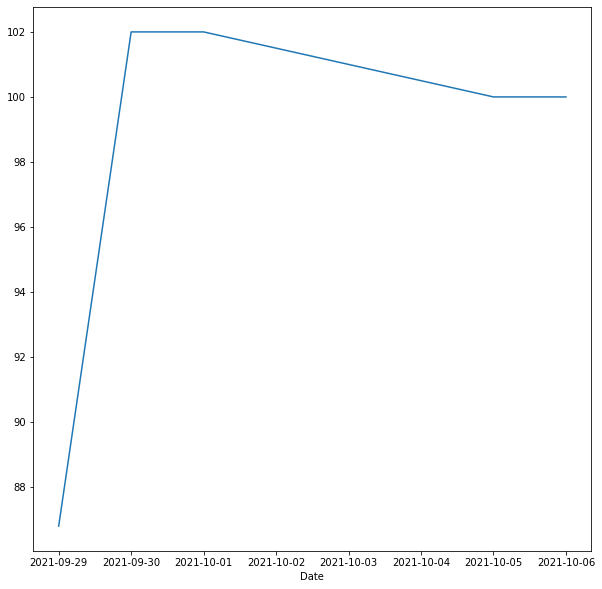

In [10]:
fueling_increment(vehicle8_data)

*It is clear from the graph that Vehicle 8 was refueled once on 09/30/2021.*

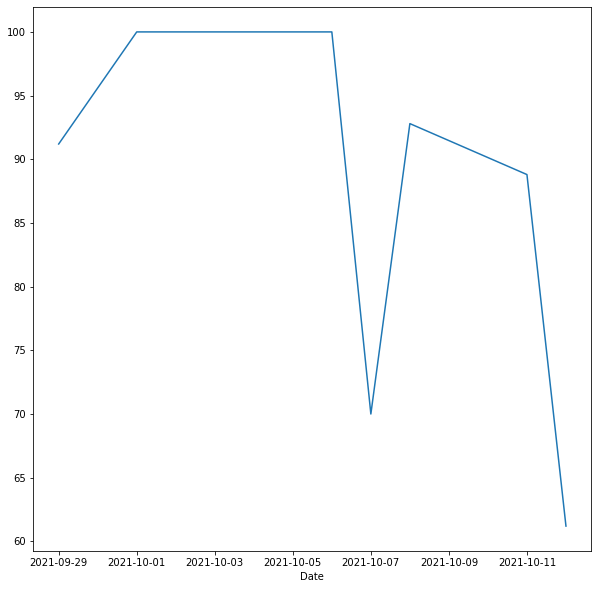

In [11]:
fueling_increment(vehicle9_data)

*For Vehicle 9 we can see that small refueling was done once on 10/01/2021 and a significant refueling was done on 10/21/2021 respectively.*

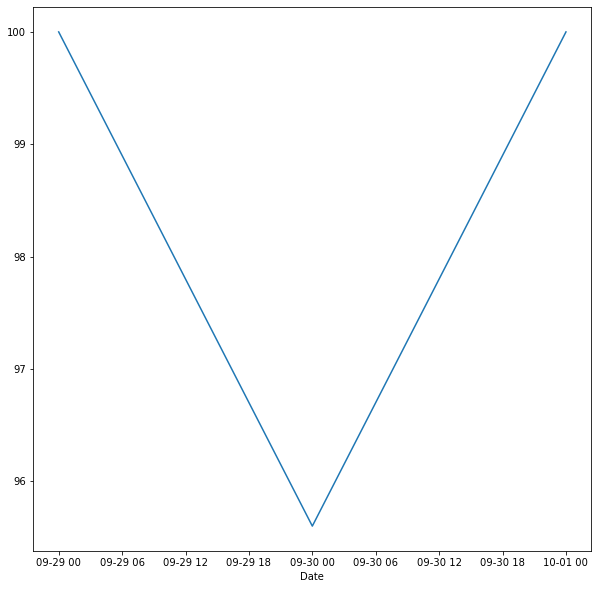

In [12]:
fueling_increment(vehicle10_data)

*For Vehicle 10 we can see that small refueling was done once on 10/01/2021.*

### 3) Check for Outliers and also smoothen the fuelLevel data points.

- We know that the 2 most important columns are speed and fuelLevels.

- For Outliers we have used 3 ways : "Z-Score", "Boxplot" and "Skewness".
- For skewness acceptable value is between -3 to 3.

In [13]:
def boxplot(data):
    plt.boxplot(data['speed'])
    print('Boxplot for Speed:')
    plt.show()

    plt.boxplot(data['fuelLevel'])
    print('\nBoxplot for FuelLevel:')
    plt.show()
    
def skewness(data):
    print("Skewness for Speed:", data['speed'].skew()) 
    print("Skewness for FuelLevel:", data['fuelLevel'].skew())

In [14]:
def Zscore(data): 
    num_features = data.dtypes[data.dtypes != "object"].index
    print("Number of Numerical Features:", len(num_features))
    
    for column in num_features:
        plt.figure()
        data.boxplot([column])
    
    Z = np.abs(stats.zscore(data))
    threshold = 3
    data = data[(Z < 3).all(axis=1)]
    return data.head()

- Outliers are not present in the dataset.
- Skewness for all the Vehicles are under acceptable range.

### 5) Find out three principal components on all the data combined.

In [15]:
frame = [vehicle1_data, vehicle2_data, vehicle3_data, vehicle4_data, vehicle5_data,
       vehicle6_data, vehicle7_data, vehicle8_data, vehicle9_data, vehicle10_data]

final_data = pd.concat(frame)

In [16]:
final_data.shape

(14990, 21)

*We have 14k observations and 21 columns after combining all the 10 datasets*

In [17]:
#Checking for null values here
final_data.isnull().sum()

timestamp                 0
longitude                 0
latitude                  0
mileage               14990
speed                     0
fuelLevel              2998
isMoving                  0
elevation                 0
road_type             10959
surface_type          11694
temp                      0
open_weatherapi_id        0
humidity                  0
wind_speed                0
wind_deg                  0
Date_Time                 0
date                      0
time                      0
day                       0
Weekday                   0
distance                 10
dtype: int64

- We will be dropping the columns 'mileage' , 'road_type' and 'surface_type'.
- We are going to choose only those observations from 'fuelLevel' and 'distance' whose values are not 'NA'.

In [18]:
final_data.drop("road_type", axis = 1, inplace = True)
final_data.drop("surface_type", axis = 1, inplace = True)
final_data.drop("mileage", axis = 1, inplace = True)
final_data = final_data[final_data['fuelLevel'].notna()]
final_data = final_data[final_data['distance'].notna()]

- We are dropping the columns we don't need. Columns that are dropped below won't be much help.

In [19]:
final_data.drop("timestamp", axis = 1, inplace = True)
final_data.drop("isMoving", axis = 1, inplace = True)
final_data.drop("Date_Time", axis = 1, inplace = True)
final_data.drop("date", axis = 1, inplace = True)
final_data.drop("time", axis = 1, inplace = True)
final_data.drop("Weekday", axis = 1, inplace = True)

In [20]:
#Checking if our dataset has any null values now.
final_data.isna().sum()

longitude             0
latitude              0
speed                 0
fuelLevel             0
elevation             0
temp                  0
open_weatherapi_id    0
humidity              0
wind_speed            0
wind_deg              0
day                   0
distance              0
dtype: int64

In [21]:
#We are now left with 11.984 observations and 12 columns.
final_data.shape

(11984, 12)

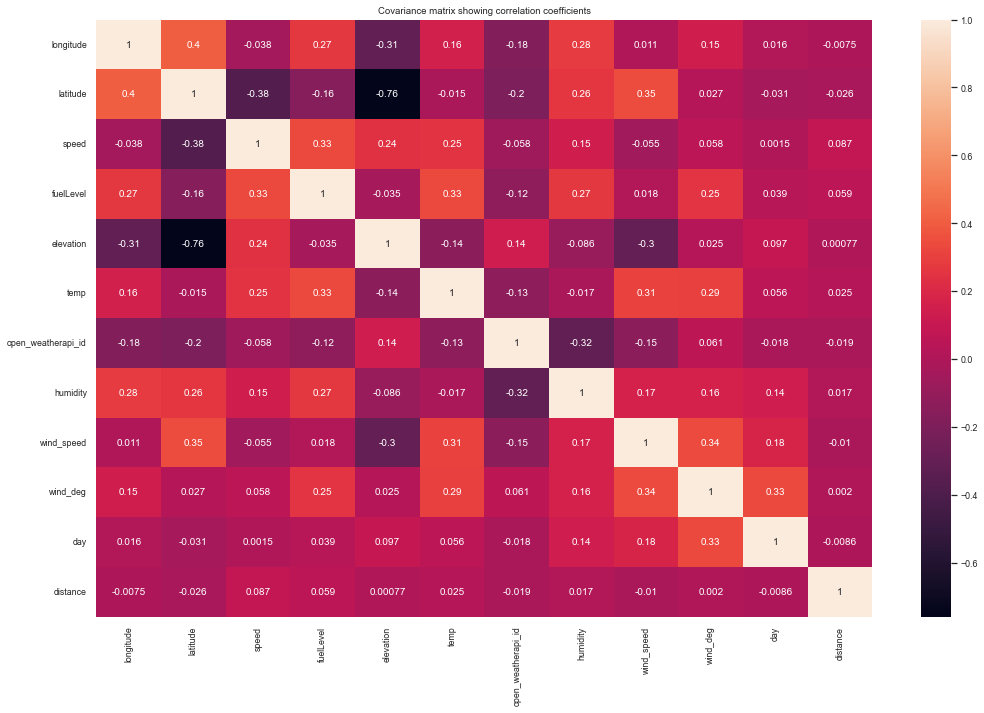

In [22]:
#Checking coorelated variables

plt.figure(figsize = (15,10))
sns.set(font_scale = 0.8)
hm = sns.heatmap(pd.DataFrame(final_data).corr(), annot = True, annot_kws = {"size":10})
plt.title("Covariance matrix showing correlation coefficients")
plt.tight_layout()
plt.show()

In [23]:
#Scaling the data using MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(final_data)

In [24]:
final_scaled = pd.DataFrame(scaled_data, columns=final_data.columns[0:12])
final_scaled.head()

,longitude,latitude,speed,fuelLevel,elevation,temp,open_weatherapi_id,humidity,wind_speed,wind_deg,day,distance
0,0.873155,0.919001,0.563012,0.400000,0.030965,0.849823,0.996032,0.72973,0.356944,0.361111,0.965517,0.002688
1,0.872025,0.918872,0.429765,0.386957,0.036430,0.849382,0.996032,0.72973,0.356944,0.361111,0.965517,0.002526
2,0.870985,0.919087,0.552681,0.413043,0.034608,0.849382,0.996032,0.72973,0.356944,0.361111,0.965517,0.002363
3,0.870843,0.919133,0.020661,0.373913,0.034608,0.849382,0.996032,0.72973,0.356944,0.361111,0.965517,0.000334
4,0.868847,0.920011,0.774787,0.413043,0.045537,0.847173,0.996032,0.72973,0.356944,0.361111,0.965517,0.004890


In [25]:
#Applying PCA with 3 components
from sklearn.decomposition import PCA
final_data_pca = PCA(n_components=3)
pc = final_data_pca.fit_transform(final_scaled)

In [26]:
final_pca = pd.DataFrame(data = pc, columns = ['PC1','PC2','PC3'])
final_pca.head()

,PC1,PC2,PC3
0,0.062315,0.511939,-0.117865
1,-0.035708,0.553135,-0.081915
2,0.060025,0.514198,-0.119074
3,-0.331227,0.681020,0.010385
4,0.219324,0.443955,-0.162268


In [27]:
final_pca.shape

(11984, 3)

### 6) Demonstrate any hypothesis of your liking using unsupervised learning technique (For eg., cluster the vehicles based on some set of features).

*We will be using Hierarchial Clustering with 10 clusters with each cluster belonging to the Vehicle number from 1 to 16*

In [28]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram, linkage

In [29]:
#The linkage function is the main function which calculates the distances between every combination of
#data points within the given data set, using the specified method and metric
#method='ward' is the method used in linkage function for hierarchical cluster analysis . The idea has
#much in common with analysis of variance (ANOVA). The linkage function specifying the distance
#between two clusters is computed as the increase in the "error sum of squares" (ESS) after fusing two
#clusters into a single cluster
Z= sch.linkage(final_data, method = 'ward')
Z

array([[9.00000000e+00, 1.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.10000000e+01, 1.19840000e+04, 0.00000000e+00, 3.00000000e+00],
       [1.20000000e+01, 1.19850000e+04, 0.00000000e+00, 4.00000000e+00],
       ...,
       [2.39600000e+04, 2.39620000e+04, 7.06521022e+03, 8.53300000e+03],
       [2.39630000e+04, 2.39640000e+04, 1.23145278e+04, 1.06820000e+04],
       [2.39610000e+04, 2.39650000e+04, 1.46938349e+04, 1.19840000e+04]])

Text(0.5, 1.0, 'Hierarchical Clusterting')

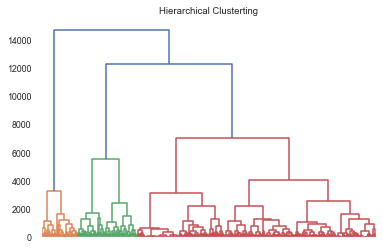

In [30]:
#Creating and plotting a dendrogram
den = sch.dendrogram(Z)
plt.tick_params(
    axis = 'x',              #which axis to apply the parameters to. Default is 'both'
    which = 'both',          #Default is 'major'; apply arguments to which ticks
    bottom = False,          #bottom, top, left, right -------> bool
    top = False,
    labelbottom = False)     #Labelbottom, labeltop, labelleft, labelright ------> bool
plt.title('Hierarchical Clusterting')

In [31]:
from sklearn.cluster import AgglomerativeClustering
#Creating a Agglomerative clustering
hc_model = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'ward')
#Fitting the model
y_cluster = hc_model.fit_predict(final_data)
#Creating Cluster column to see which cluster the row belongs to
final_clustered = final_data.copy()
final_clustered["Cluster"] = y_cluster.astype('object')
final_clustered.head()

,longitude,latitude,speed,fuelLevel,elevation,temp,open_weatherapi_id,humidity,wind_speed,wind_deg,day,distance,Cluster
1,12.261809,55.588577,54.787107,46.8,9,15.22,802,80,5.14,130,29,0.856350,7
2,12.254626,55.587685,42.076716,45.6,12,15.21,802,80,5.14,130,29,0.804590,7
3,12.248012,55.589165,53.801685,48.0,11,15.21,802,80,5.14,130,29,0.752899,7
4,12.247107,55.589485,3.052496,44.4,11,15.21,802,80,5.14,130,29,0.106489,7
5,12.234411,55.595547,74.988241,48.0,17,15.16,802,80,5.14,130,29,1.557770,0


In [32]:
#Getting to know the value os each clusters.
final_clustered['Cluster'].value_counts()

2    2526
0    1617
7    1489
8    1465
5    1436
1     995
3     735
4     642
6     567
9     512
Name: Cluster, dtype: int64

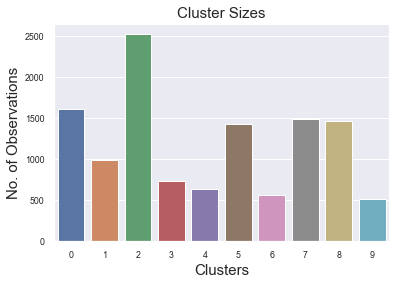

In [33]:
sns.countplot(data = final_clustered, x = 'Cluster')

plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Observations', fontsize = 15)
                                                                             
plt.show() 

We can see that Cluster 2 has the maximum observations and Cluster 9 has the least observations.